In [1]:
# %matplotlib_svg
import numpy as np
from matplotlib import pyplot as plt

# matplotlib-繪制精美的圖表

## 快速繪圖

為了將 matplotlib 繪製的圖表嵌入 Notebook 中，需要執行下面的指令：

In [2]:
%matplotlib inline

使用 `inline` 模式在 Notebook 中繪製的圖表會自動關閉，為了在 Notebook 的多個儲存格內操作同一幅圖表，需要執行下面的魔法指令：

In [3]:
%config InlineBackend.close_figures = False

### 使用pyplot模組繪圖

matploblib 的 pyplot 模組提供了與 MATLAB 類似的繪圖函數呼叫介面，方便使用者快速繪製二維圖表。

下面實例：
- ❶ 首先載入 `matplotlib` 的繪圖模組 `pyplot`，並重新命名為 `plt`。
- ❷ 呼叫 `figure()` 建立一個 `Figure(圖表)` 物件，並且它將成為目前 `Figure` 物件。也可以不建立 `Figure` 物件而直接呼叫接下來的 `plot()` 進行繪圖，這時 matplotlib 會自動建立一個 `Figure` 物件。
  - `figsize` 參數指定 `Figure` 物件的寬度和高度，單位為`英吋`。
  - `dpi` 參數指定 `Figure` 物件的解析度，即每英吋所表示的像素數，這裡使用預設值 `80`。因此本例中所建立的 `Figure` 物件的寬度為 8*80=640 個像素。
- ❸ 建立 `Figure` 物件之後，接下來呼叫 `plot()` 在目前的 `Figure` 物件上繪圖。實際上 `plot()` 是在 `Axes(子圖)` 物件上繪圖，如果目前的 `Figure` 物件中沒有 `Axes` 物件，將為之建立一個幾乎填滿整個圖表的 `Axes`物件，並且使此 `Axes` 物件成為目前的 `Axes` 物件。`plot()` 的前兩個參數是分別表示 X, Y 軸資料的物件，這裡使用的是 Numpy 陣列。使用關鍵字參數可以指定所繪製曲線的各種屬性：
  - `label`：給曲線指定一個標籤，此標籤將在圖示中顯示。如果標籤字串的前後有字元`"$"`，matplotlib 會使用內嵌的 LaTeX 引擎將其顯示為數學公式。
  - `color`：指定曲線的顏色，顏色可以用英文單字或以 `"#"` 字元開頭的 6 位元十六進位數表示，例如 `'#ff0000'` 表示紅色。或使用值在 0 到 1 範圍之內的三個元素的元組來表示，例如 `(1.0, 0.0, 0.0)` 也表示紅色。
  - `linewidth`：指定曲線的寬度，可以不是整數，也可以使用縮寫形式的參數名稱 `lw`。
- ❹ 直接透過第三個參數 `'b--'` 指定曲線的顏色和線型，它透過一些易記的符號指定曲線的樣式。其中 `'b'` 表示藍色，`'--'` 表示線型為虛線。在 IPython 中輸入 `plt.plot?` 可以檢視格式化字串以及各個參數的詳細說明。
- ❺ 接下來透過一系列函數設定目前 `Axes` 物件的各個屬性：
  - `xlabel`, `ylabel`：分別設定 X, Y 軸的標題文字。
  - `title`：設定子圖的標題。
  - `xlim`, `ylim`：分別設定 X, Y 軸的顯示範圍。
  - `legend`：顯示圖示，即圖中表示每條曲線的標籤(label)和樣式的矩形區域。
- ❻ 最後呼叫 `plt.show()` 顯示繪圖視窗，在 Notebook 中可以省略此步驟。在通常的執行情況下，`show()` 將阻塞程式的執行，直到使用者關閉繪圖視窗。

> 使用 LaTeX 語法繪製數學公式儲相當大地降低圖表的描繪速度。

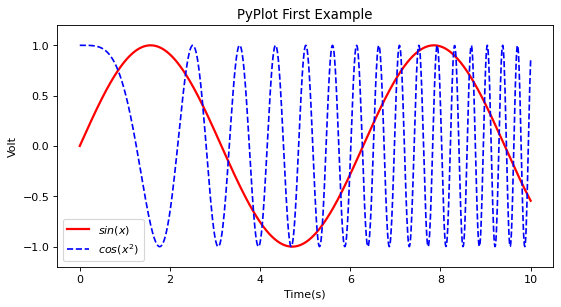

In [4]:
#%fig=使用pyplot模組快速將資料繪製成曲線圖
import matplotlib.pyplot as plt #❶

x = np.linspace(0, 10, 1000)
y = np.sin(x)
z = np.cos(x**2)

plt.figure(figsize=(8,4), dpi=80) #❷

plt.plot(x,y,label="$sin(x)$",color="red",linewidth=2) #❸
plt.plot(x,z,"b--",label="$cos(x^2)$") #❹

plt.xlabel("Time(s)") #❺
plt.ylabel("Volt") 
plt.title("PyPlot First Example") 
plt.ylim(-1.2,1.2) 
plt.legend() 

plt.show() #❻

> **WARNING**

> 使用LaTeX語法繪制數學公式會極大地降低圖表的描繪速度。

可以呼叫 `plt.savefig()` 將目前的 `Figure` 物件儲存成影像檔，影像格式由影像檔的副檔名決定。

下面的程式將目前的圖表儲存為 `test.png` ，並且透過 `dpi` 參數指定影像的解析度為 120，因此輸出影像的寬度為 8*120=960 個像素。

In [5]:
plt.savefig("test.png", dpi=120)

> **TIP**

> 若果關閉了圖表視窗，則無法使用`savefig()`儲存圖形。實際上不需要呼叫`show()`顯示圖表，可以直接用`savefig()`將圖表儲存成圖形檔案。使用這種方法可以很容易撰寫批次輸出圖表的程式。    

`savefig()` 的第一個參數可以是檔案名稱，也可以是和 python 的檔案物件有相同呼叫介面的物件。例如可以將影像儲存到 `io.BytesIO` 物件中，這樣就獲得了一個表示影像內容的字串。這裡需要使用 ~~`fmt`~~ `format` 參數指定儲存的影像格式。

(2020-01-21) `fmt` 己改名為 `format`

In [6]:
import io
buf = io.BytesIO() # 建立一個用來儲存圖形內容的BytesIO物件
# plt.savefig(buf, fmt="png") # 將圖形以png格式儲存進buf中
plt.savefig(buf, format="png") # 將圖形以png格式儲存進buf中
buf.getvalue()[:20] # 顯示圖形內容的前20個位元組

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x80'

### 面對物件模式繪圖

matplotlib 實際上是一套物件導向的繪圖函數庫，它所繪製的圖表中的每個繪畫素，例如線條、文字、刻度等在記憶體中都有一個物件與之對應。

為了方便快速繪圖，matplotlib 透過 `pyplot` 模組提供了一套和 MATLAB 類似的繪圖 API，將許多繪圖物件所組成的複雜結構隱藏在這套 API 內部。

`pyplot` 模組雖然用法簡單，但不適合在較大的應用程式中使用。

為了將物件導向的繪圖函數庫包裝成只使用函數的 API，`pyplot` 模組的內部儲存了目前圖表以及目前子圖等資訊。可以使用 `gcf()` 和 `gca()` 獲得這兩個物件，它分別是 "Get Current Figure" 和 "Get Current Axes" 開頭字母的縮寫。

`gcf()` 獲得的是表示圖表的 `Figure` 物件。

`gca()` 獲得的是表示子圖的 `Axes` 物件。

In [7]:
fig = plt.gcf()
axes = plt.gca()
print( fig, axes )

Figure(640x320) AxesSubplot(0.125,0.125;0.775x0.755)


在 pyplot 模組中，許多函數都是對目前的 `Figure` 或 `Axes` 物件進行處理，例如前面介紹的 `plot()`, `xlabel()`, `savefig()`等。

我們可以在 IPython 中輸入函數名稱並加 `??`，檢視這些函數的原始程式碼以了解它們是如何呼叫各種物件的方法進行繪圖處理的。

`plot()` 函數實際上會透過 `gca()` 獲得目前的 `Axes` 物件 ax，然後再呼叫它的 `plot()` 方法來實現真正的繪圖。

In [8]:
#%hide
plt.close("all")    # closes all the figure windows

### 組態屬性

matplotlib 所繪製圖表的每個組成部分都和一個物件對應，可以透過呼叫這些物件的屬性設定方法 `set_*()` 或 pyplot 模組的屬性設定函數 `setp()` 來設定它們的屬性值。

例如下面的實例，`plot()` 傳回一個元素類型的 `Line2D` 的列表，並設定 `Line2D` 物件的屬性。

下面透過呼叫 `Line2D` 物件的 `set_alpha()` ，修改它在圖表中對應曲線的透明度。

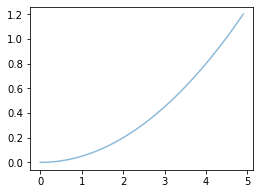

In [9]:
#%fig[1x3]=組態繪圖物件的屬性
plt.figure(figsize=(4, 3))
x = np.arange(0, 5, 0.1)
line = plt.plot(x, 0.05*x*x)[0] # plot傳回一個清單
line.set_alpha(0.5) # 呼叫Line2D物件的set_*()方法設定屬性值

下面程式會同時繪製正弦和餘弦兩條曲線，`lines` 是一個有兩個 `Line2D` 物件的列表：

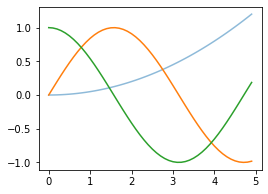

In [10]:
lines = plt.plot(x, np.sin(x), x, np.cos(x))
plt.show()

呼叫 `setp()` 可以同時設定多個物件的屬性，這裡同時設定兩條曲線的顏色和線寬：

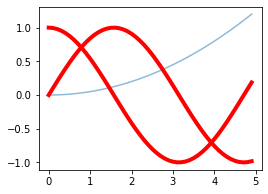

In [11]:
plt.setp(lines, color="r", linewidth=4.0);
plt.show()

可以透過呼叫 `Line2D` 物件的 `get_*()` 或透過 `plt.getp()` 來取得物件的屬性值：

In [12]:
print( line.get_linewidth() )
print( plt.getp(lines[0], "color") ) # 傳回color屬性

1.5
r


注意 `getp()` 和 `setp()` 不同，它只能對一個物件操作，它有兩種用法:
- 指定屬性名稱：傳回物件的某個屬性的值。
- 不指定屬性名稱：輸出物件的所有屬性和值。

下面透過 `getp()` 檢視 `Figure` 物件的屬性：

In [13]:
f = plt.gcf()
# %omit plt.getp(f)
plt.getp(f)

    agg_filter = None
    alpha = None
    animated = False
    axes = [<AxesSubplot:>]
    children = [<matplotlib.patches.Rectangle object at 0x000001C...
    clip_box = None
    clip_on = True
    clip_path = None
    constrained_layout = False
    constrained_layout_pads = (0.04167, 0.04167, 0.02, 0.02)
    contains = None
    default_bbox_extra_artists = [<AxesSubplot:>, <matplotlib.lines.Line2D object a...
    dpi = 72.0
    edgecolor = (1.0, 1.0, 1.0, 0.0)
    facecolor = (1.0, 1.0, 1.0, 0.0)
    figheight = 3.0
    figure = None
    figwidth = 4.0
    frameon = True
    gid = None
    in_layout = True
    label = 
    path_effects = []
    picker = None
    rasterized = None
    size_inches = [4. 3.]
    sketch_params = None
    snap = None
    tight_layout = False
    transform = IdentityTransform()
    transformed_clip_path_and_affine = (None, None)
    url = None
    visible = True
    window_extent = TransformedBbox(     Bbox(x0=0.0, y0=0.0, x1=4.0, ...
    zorder = 0


`Figure` 物件的 `axes` 屬性是一個清單，它儲存圖表中的所有子圖物件。下面的程式檢視目前圖表的 `axes` 屬性，它就是 `gca()` 所獲得的目前子圖物件：

In [14]:
print( plt.getp(f, "axes"), plt.getp(f, "axes")[0] is plt.gca() )

[<AxesSubplot:>] True


用 `plt.getp()` 可以繼續取得 `AxesSubplot` 物件的屬性，例如它的 `lines` 屬性為子圖中的 `Line2D` 物件列表：

In [15]:
alllines = plt.getp(plt.gca(), "lines")
print( alllines, alllines[0] is line ) # 其中的第一條曲線就是最開始繪制的那條曲線

<a list of 3 Line2D objects> True


因為 matploblib 實際上是一套物件導向的繪圖函數庫，因此也可以直接取得物件的屬性，例如：

In [16]:
print( f.axes, len(f.axes[0].lines) )

[<AxesSubplot:>] 3


### 繪制多子圖

一個 `Figure` 物件可以包含多個子圖(Axes)，在 matploblib 中用 `Axes` 物件表示一個繪圖區域，在本書中稱為子圖。

在前面的實例中，`Figure` 物件只包含一個子圖，可以使用 `subplot()` 快速繪製包含多個子圖的圖表，它的呼叫形式如下：

```
subplot(numRows, numCols, pltNum)
```

圖表的整個繪圖區域被等距為 `numRows` 行 和 `numCols` 列，然後按照從左到右、從上到下的順序對每個區域進行編號，左上區域的編號為 1。`plotNum` 參數指定所建立 `Axes` 物件的區域。如果 `numRows`, `numCols`, `plotNum` 三個參數都小於10，則可以把它們縮寫成一個整數，例如 `subplot(323)` 和 `subplot(3,2,3)`的含義相同。如果新建立的子圖和之前建立的子圖區域有重疊的部分，之前的子圖將被刪除。

下面的程式建立如下所示的 3 行 2 列共 6 個子圖，並透過 `facecolor` 參數給每個子圖設定不同的背景顏色。

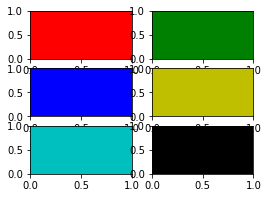

In [17]:
#%fig[1x2]=在Figure物件中建立多個子圖
for idx, color in enumerate("rgbyck"):  
    # plt.subplot(321+idx, axisbg=color)
    plt.subplot(321+idx, facecolor=color)

plt.show()

如果希望某個子圖佔據整行或整列，可以以下呼叫 `subplot()` ，程式的輸出如圖所示

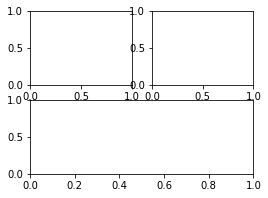

In [18]:
ax1 = plt.subplot(221) # 第一行的左圖
ax2 = plt.subplot(222) # 第一行的右圖
ax3 = plt.subplot(212) # 第二整行;
plt.show()

In [19]:
#%hide
plt.close("all")

在繪圖視窗的工具列中，有一個名為 "Configure Subplots" 的按鈕，點撃它會出現調節子圖間距和子圖與圖表框距離的對話方塊。也可以在程式中呼叫 `subplots_adjust()` 調節這些參數，它有 `left`, `right`, `bottom`, `top`, `wspace`, `hspace` 共 6 個參數，這些參數與對話方塊中的各個控制項對應。參數的設定值範圍為 0 到 1，它們是以圖表繪圖區域的寬和高進行正規化之後的座標或長度。

`subplot()` 傳回它所建立的 `Axes` 物件，我們可以將這些物件用變數儲存起來，然後用 `sca()` 交替讓它們成為目前的 `Axes` 物件，並呼叫 `plot()` 在其中繪圖。

如果需要同時繪製多幅圖表，可以給 `figure()` 傳遞一個整數參數來指定 `Figure` 物件的序號。

如果序號所指定的 `Figure` 物件己經存在，將不建立新的物件，而只是讓它成為目前的 `Figure` 物件。

下面的程式示範了依次在不同圖表的不同子圖中繪製曲線：

- ❶ 呼叫 `figure(1)` 讓圖表1 成為目前圖表，並在其中繪圖。
- ❷ 呼叫 `sca(ax1)` 和 `sca(ax2)` 分別讓子圖 ax1 和 ax2 成為目前子圖，並在其中繪圖。

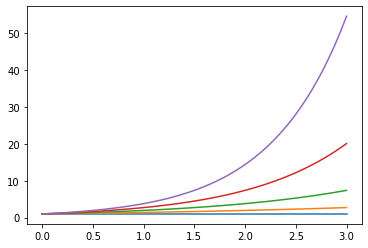

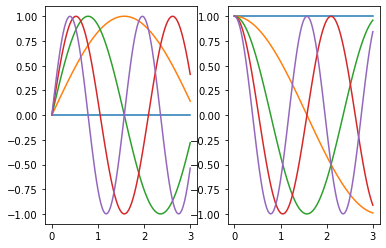

In [20]:
#%fig[1x2]=同時在多幅圖表、多個子圖中進行繪圖
plt.figure(1) # 建立圖表1
plt.figure(2) # 建立圖表2
ax1 = plt.subplot(121) # 在圖表2中建立子圖1
ax2 = plt.subplot(122) # 在圖表2中建立子圖2

x = np.linspace(0, 3, 100)
for i in range(5):
    plt.figure(1)  #❶ 選取圖表1
    plt.plot(x, np.exp(i*x/3))

    plt.sca(ax1)   #❷ 選取圖表2的子圖1
    plt.plot(x, np.sin(i*x))
    plt.sca(ax2)  # 選取圖表2的子圖2
    plt.plot(x, np.cos(i*x))

plt.show()

> **TIP**

> 也可以不呼叫`sca()`指定目前子圖，而直接呼叫`ax1`和`ax2`的`plot()`方法繪圖。

`subplots()` 可以一次產生多個子圖，並傳回圖表物件和儲存子圖物件的陣列。

在下面的實例中，`axes` 是一個形狀為 (2,3) 的陣列，每個元素都是一個子圖物件，可以利用 python 的設定值功能將這個陣列中的每個元素用一個變數表示：

(2, 3)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)


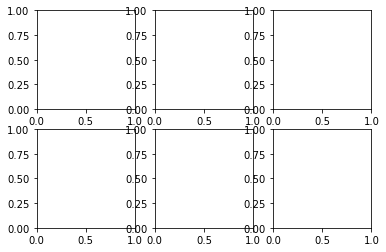

In [21]:
#%nofig
fig, axes = plt.subplots(2, 3)
[a, b, c], [d, e, f] = axes
print( axes.shape )
print( b )

呼叫 `subplot2grid()` 進行更複雜的表格版面配置。表格版面配置和在 Excel 或 Word 中繪製表格十分類似，其呼叫參數如下：

```
subplot2grid(shape, loc, rowspan=1, colspan=1, **kwargs)
```

其中，
- `shape`：表示表格形狀的元組`(行數, 列數)`。
- `loc`：為子圖左上角所在的座標`(行, 列)`。
- `rowspan`, `colspan`：分別為子圖所佔據的行數和列數。

在下面的實例中，在 3x3 的網格上建立 5 個子圖，在每個子圖中間顯示該子圖對應的變數名稱，如圖4-5所示：

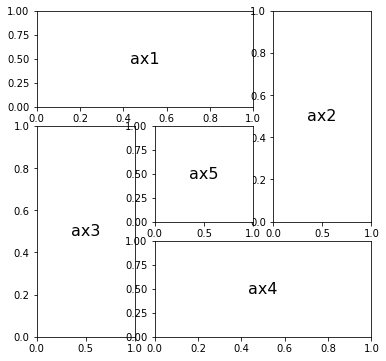

In [22]:
#%fig=使用subplot2grid()建立表格佈局
plt.close("all")

fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
ax2 = plt.subplot2grid((3, 3), (0, 2), rowspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 0), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 1), colspan=2)
ax5 = plt.subplot2grid((3, 3), (1, 1));
#%hide
for idx, ax in enumerate(fig.axes, 1):
    ax.text(0.5, 0.5, "ax{}".format(idx), ha="center", va="center", fontsize=16)

plt.show()

### 組態檔

繪製一幅圖需要對許多物件的屬性進行設定，例如 顏色、字型、線型 等。在前面的繪圖程式中，並沒有逐一對這些屬性進行設定，而是直接採用 matploblib 的預設設定。matplotlib 將這些預設設定儲存在一個名為 `matplotlibrc` 的設定檔中，透過修改設定檔，可以修改圖表的預設樣式。

在 matplotlib 中可以使用多個 `matplotlibrc` 設定檔，它們的搜索順序如下：順序靠前的設定檔將被優先採用。
- 目前路徑：程式的目前路徑。
- 使用者設定路徑：通常在使用者資料夾的 `.matplotlib` 目錄下，可以透過環境變數 `MATPLOTLIBRC` 修改它的位置。
- 系統組態路徑：儲存在 matplotlib 的安裝目錄下的 `mpl-data` 中。

透過下面的敘述可以取得 使用者設定路徑：

In [23]:
import matplotlib
from os import path
path.abspath(matplotlib.get_configdir())

'C:\\Users\\92091\\.matplotlib'

透過下面的敘述可以獲得 目前使用的設定檔的路徑：

In [25]:
path.abspath(matplotlib.matplotlib_fname())

'D:\\Program_File\\VSCode_Portable\\workon_env\\pyElan\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

如果使用文字編輯器開啟此設定檔，就會發現它實際上是一個字典。為了對許多的設定進行區分，字典的鍵根據設定的種類，用 `"."` 分為多段。設定檔的讀取可以使用 `rc_params()` ，它傳回一個設定字典：

In [26]:
# %omit print(matplotlib.rc_params())
print(matplotlib.rc_params())

_internal.classic_mode: False
agg.path.chunksize: 0
animation.avconv_args: []
animation.avconv_path: avconv
animation.bitrate: -1
animation.codec: h264
animation.convert_args: []
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.html_args: []
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: black
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: black
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes

在 matplotlib 模組載入時會呼叫 `rc_params()` ，並把獲得的設定字典儲存到 `rcParams` 變數中：

In [27]:
# %omit print(matplotlib.rcParams)
print(matplotlib.rcParams)

_internal.classic_mode: False
agg.path.chunksize: 0
animation.avconv_args: []
animation.avconv_path: avconv
animation.bitrate: -1
animation.codec: h264
animation.convert_args: []
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.html_args: []
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: black
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: black
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes

In [28]:
#%hide
plt.close("all")

matplotlib 將使用 `rcParams` 字典中的設定進行繪圖。使用者可以直接修改此字典中的設定，所做的改變會反映到此後建立的繪畫素。例如下面的指令稿所繪製的聚合線將帶有圓形的點識別符號：

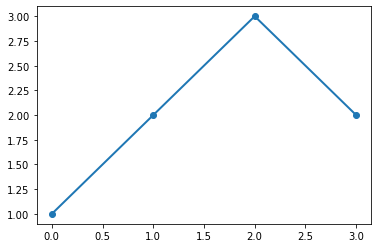

In [35]:
# %%disabled
plt.close("all")
matplotlib.rcParams["lines.marker"] = "o"
plt.plot([1,2,3,2])
plt.show()

為了方便對設定字典進行設定，可以使用 `rc()`。下面的實例同時設定點識別符號、線寬和顏色。

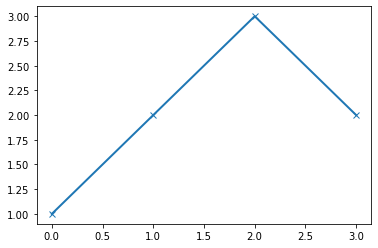

In [46]:
# %%disabled
plt.close("all")
matplotlib.rc("lines", marker="x", linewidth=2, color="red")    # color 的設定沒有反應
plt.plot([1,2,3,2])
plt.show()

如果希望恢復到 matplotlib 載入時從設定檔讀取的預設設定，可以呼叫 `redefaults()`：

In [47]:
# %%disabled
matplotlib.rcdefaults()

如果手動修改了設定檔，希望重新從設定檔載入最新的設定，可以呼叫：

In [48]:
# %%disabled
matplotlib.rcParams.update( matplotlib.rc_params() )

> **TIP**

> 透過`pyplot`模組也可以使用`rcParams`、`rc`和`rcdefaults`。

`matplotlib.style` 模組提供繪圖樣式切換功能，所有可選樣式可以透過 `available` 獲得：

In [49]:
from matplotlib import style
print( style.available )

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


呼叫 `use()` 函數即可切換樣式，例如下面使用 `"ggplot"` 樣式繪圖

In [50]:
style.use("ggplot")

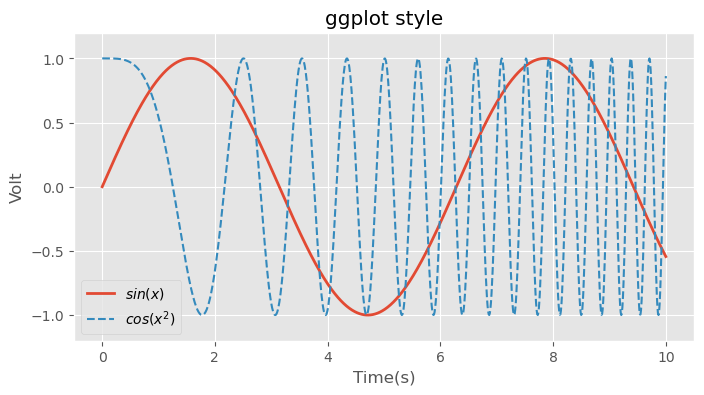

In [51]:
#%figonly=使用ggplot型態繪圖
import numpy as np
import matplotlib.pyplot as plt

style.use("ggplot")

plt.close("all")

x = np.linspace(0, 10, 1000)
y = np.sin(x)
z = np.cos(x**2)

plt.figure(figsize=(8,4))

plt.plot(x,y,label="$sin(x)$",linewidth=2)
plt.plot(x,z,"--",label="$cos(x^2)$")

plt.xlabel("Time(s)")
plt.ylabel("Volt") 
plt.title("ggplot style") 
plt.ylim(-1.2,1.2) 
plt.legend();
plt.show()

### 在圖表中顯示中文

matplotlib 的預設設定檔中所使用的字型無法正確顯示中文，可以透過下面幾種方法設定中文字型：
- 在程式中直接指定字型。
- 在程式開頭修改設定字典 `rcParams`。
- 修改設定檔。

在 matplotlib 中可以透過字型名指定字型，而每個字型名都與一個字型檔案相對應。透過下面的程式可以獲得所有可用字型的列表：

In [52]:
from matplotlib.font_manager import fontManager
fontManager.ttflist[:6]

[<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>,
 <Font 'cmb10' (cmb10.ttf) normal normal 400 normal>,
 <Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>,
 <Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>,
 <Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>,
 <Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>]

`ttflist` 是 matplotlib 的系統字型清單。其中每個元素都是表示字型的 `Font` 物件，下面的程式顯示了第一個字型檔案的全路徑和字型名，由路徑可知它是 matplotlib 附帶的字型：

In [53]:
print( fontManager.ttflist[0].name )
print( fontManager.ttflist[0].fname )

DejaVu Sans Display
D:\Program_File\VSCode_Portable\workon_env\pyElan\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSansDisplay.ttf


In [54]:
#%hide
plt.close("all")

> **SOURCE**

> `scpy2/matplotlib/chinese_fonts.py`：顯示系統中所有檔案大於1M的TTF字型，請讀者使用該程式查詢電腦中可使用的中文字型名。

下面的程式使用字型清單中的字型顯示中文文字

❶ 利用 `os` 模組中的 `stat()` 取得字型檔案的大小，並保留字型列表中所有大於 1M 的字型檔案。由於中文字型檔案通常都很大，因此使用這種方法可以粗略地找出所有的中文字型檔案。

❷ 呼叫子圖物件的 `text()` 在其中增加文字，注意文字必須是 Unicode 字串。透過一個描述字型的字典指定文字的字型：`fontname` 鍵對應的值就是字型名。

D:\Program_File\VSCode_Portable\workon_env\pyElan\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program_File\VSCode_Portable\workon_env\pyElan\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25991 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program_File\VSCode_Portable\workon_env\pyElan\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23383 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program_File\VSCode_Portable\workon_env\pyElan\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22411 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program_File\VSCode_Portable\workon_env\pyElan\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0, flags=flags)
D:

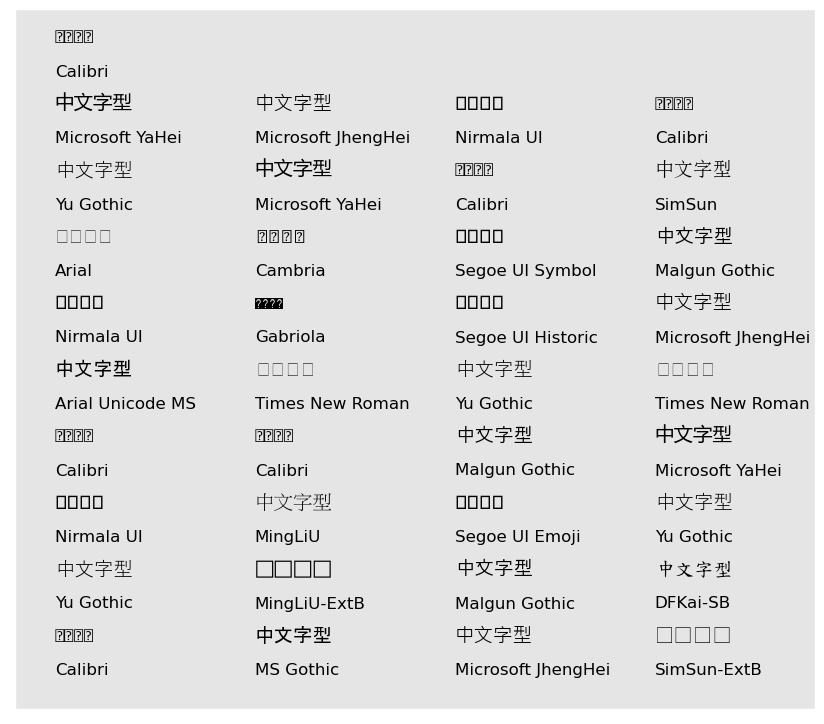

In [55]:
#%fig=顯示系統中所有的中文字型名
import os
from os import path

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111)
plt.subplots_adjust(0, 0, 1, 1, 0, 0)
plt.xticks([])
plt.yticks([])
x, y = 0.05, 0.05
fonts = [font.name for font in fontManager.ttflist if 
            path.exists(font.fname) and os.stat(font.fname).st_size>1e6] #❶
font = set(fonts)
dy = (1.0 - y) / (len(fonts) // 4 + (len(fonts)%4 != 0))

for font in fonts:
    t = ax.text(x, y + dy / 2, u"中文字型", 
                {'fontname':font, 'fontsize':14}, transform=ax.transAxes) #❷
    ax.text(x, y, font, {'fontsize':12}, transform=ax.transAxes)
    x += 0.25
    if x >= 1.0:
        y += dy
        x = 0.05
plt.show()

由於 matplotlib 只搜索 TTF 字型檔案，因此無法透過上述方法使用系統中安裝的許多複合 TTC 字型檔案。可以直接建立使用字型檔案的 `FontProperties` 物件，並使用此物件指定圖表中的各種文字的字型。

下面是實例：

❶ 建立一個描述字型屬性的 `FontProperties` 物件，並設定其 `fname` 屬性為字型檔案的絕對路徑。

❷ 透過 `fontproperties` 參數將 `FontProperties` 物件傳遞給顯示文字的函數。

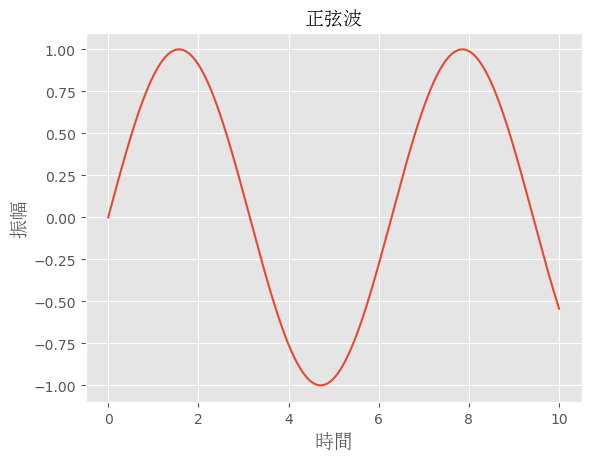

In [56]:
#%nofig
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14) #❶
t = np.linspace(0, 10, 1000)
y = np.sin(t)
plt.close("all")
plt.plot(t, y)
plt.xlabel(u"時間", fontproperties=font) #❷
plt.ylabel(u"振幅", fontproperties=font)
plt.title(u"正弦波", fontproperties=font)
plt.show()

還可以透過字型工具將 TTC 字型檔案分解為多個 TTF 字型檔案，並將其複製到系統的字型資料夾中。為了縮短啟動時間，matplotlib 不會每次啟動時都重新掃描所有的字型檔案並建立字型列表，因此在複製完字型檔案之後，需要執行下面的敘述重新建立字型列表：

In [57]:
from matplotlib.font_manager import _rebuild
_rebuild()

還可以直接修改設定字典，設定預設字型，這樣就不需要在每次繪製文字時設定字型了。例如：

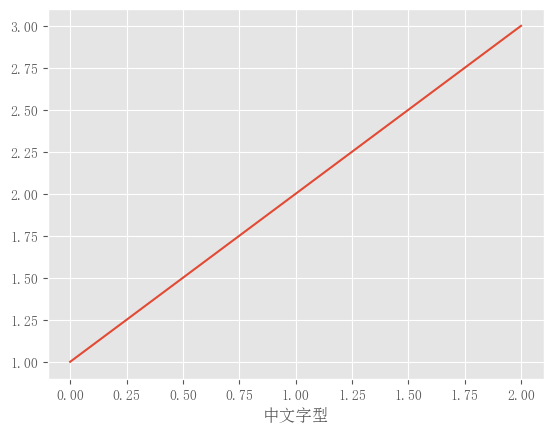

In [58]:
# %%disabled
plt.close("all")
plt.rcParams["font.family"] = "simsun" # "SimHei"
plt.plot([1,2,3])
# plt.xlabel(0.5 ,0.5, u"中文字型")    # 這是錯的
plt.xlabel(u"中文字型")
plt.show()

或修改上節介紹的設定檔，修改其中的 `font.family` 設定為 `SimHei` ，注意 `SimHei` 是字型名，請執行前面的程式來檢視系統中所有可用的中文字型名。

In [ ]:
#%hide
%exec_python -m scpy2.matplotlib.chinese_fonts